In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

wine = pd.read_csv('redwine.csv')
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [2]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [3]:
#adding t, returns the stats summary of wine(df): found about this is google 
wine.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


Text(0, 0.5, 'Alcohol')

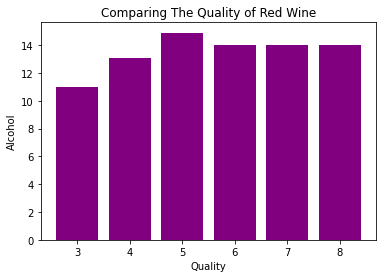

In [4]:
#comparing the quality of wine 
plt.bar(wine['quality'],wine['alcohol'],color='purple')
plt.title('Comparing The Quality of Red Wine')
plt.xlabel('Quality')
plt.ylabel('Alcohol')

D:\im_uz\Class\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Alcohol')

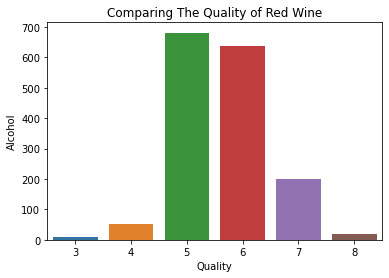

In [5]:
#another way of plotting the quality of red wine 
import seaborn as sns
sns.countplot(wine['quality'])
plt.title('Comparing The Quality of Red Wine')
plt.xlabel('Quality')
plt.ylabel('Alcohol')

<AxesSubplot:>

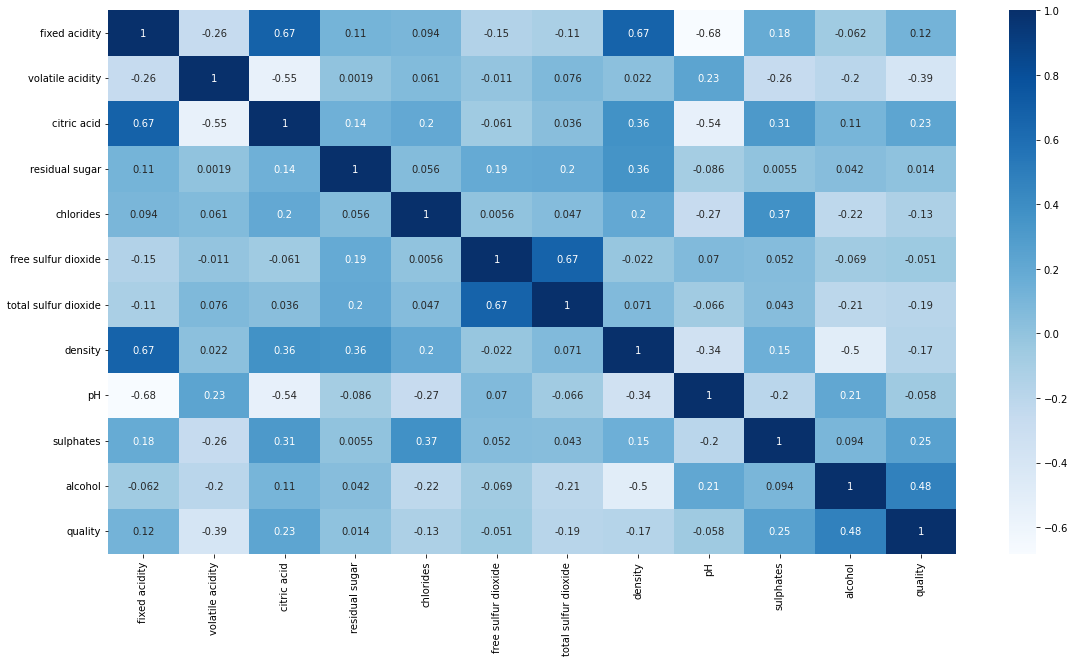

In [6]:
#check correlation: to check which variables are linear related 
#with a heatmap
plt.figure(figsize=[19,10],facecolor='white')
sb.heatmap(wine.corr(),annot=True, cmap ="Blues")

In [7]:
#when refering to the heat map, you see that free sulfur dioxide and total sulfar dioxide
#are correclated, so they get dropped/cut off
wine = wine.drop('total sulfur dioxide', axis=1)


In [8]:
#validation rule to be used to determine which model is best
#comparing and using best quality
wine['best quality'] = [1 if x > 5 else 0 for x in wine.quality]



In [9]:
#two types of wine, being replaced with 1 and 0
wine.replace({'white': 0, 'red': 1}, inplace=True)



In [10]:
#split 
features = wine.drop(['quality', 'best quality'], axis=1)
target = wine['best quality']

xtrain, xtest, ytrain, ytest = train_test_split(
    features, target, test_size=0.2, random_state=40)

xtrain.shape, xtest.shape


((1279, 10), (320, 10))

In [11]:
#normalizae data for stable and fast model 
norm = MinMaxScaler()
xtrain = norm.fit_transform(xtrain)
xtest = norm.transform(xtest)


In [12]:
#test with the machine learning model, logistic regression
#training and validation of data
test_model = [LogisticRegression()]

for i in range(1):
    test_model[i].fit(xtrain, ytrain)

    print(f'{test_model[i]} : ')
    print('Training: ', metrics.roc_auc_score(ytrain, test_model[i].predict(xtrain)))
    print('Validation: ', metrics.roc_auc_score(
        ytest, test_model[i].predict(xtest)))
    print()


LogisticRegression() : 
Training:  0.7286886534333447
Validation:  0.765345444536196



D:\im_uz\Class\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


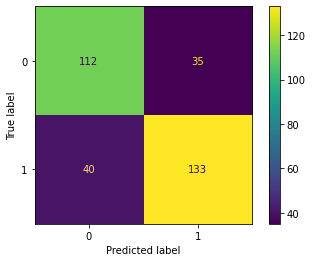

In [13]:
#ploting a confusion matrix based on logistic regression
metrics.plot_confusion_matrix(test_model[0], xtest, ytest)
plt.show()
